In [2]:
#!pip install tensorflow


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#!pip install yfinance


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
#!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing dependencies

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM
import datetime

#To ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
ticker = 'TSLA'

data = yf.download(ticker,start='2020-01-01',end=datetime.datetime.today().strftime('%Y-%m-%d'))

# Focus on 'Close' prices for simplicity

data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [6]:
scaler = MinMaxScaler()

In [7]:
scaled_data = scaler.fit_transform(data)

In [8]:
# split into training and testing datasets
train_size = int(len(scaled_data) * 0.8)  # 80% train, 20% test
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [9]:
# Create training sequences
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create testing sequences
x_test, y_test = [], []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [10]:
# start as empty lists, not arrays
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# convert to numpy arrays at the end
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [11]:
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a deeper LSTM model
model = Sequential()

# 1st LSTM layer
model.add(LSTM(
    units=100,                # more units than default 50
    return_sequences=True,    # output sequences for next LSTM layer
    input_shape=(x_train.shape[1], 1)
))
model.add(Dropout(0.2))        # 20% dropout for regularization

# 2nd LSTM layer
model.add(LSTM(
    units=100, 
    return_sequences=False     # last LSTM layer
))
model.add(Dropout(0.2))

# Dense output layer
model.add(Dense(units=1))      # predicting next closing price

# Compile with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,                 # increase epochs for better learning
    batch_size=32,             # smaller batch size often improves convergence
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0527 - val_loss: 0.0114
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 9/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 10/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 11/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 12/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
MAE: 16.30
RMSE: 21.29
R²: 0.859


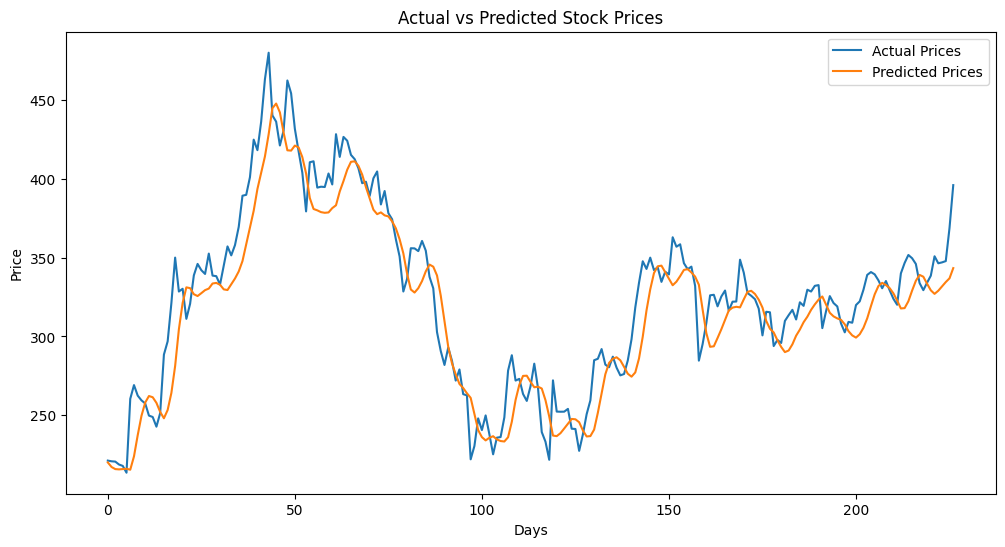

In [13]:
# Make predictions on test set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(real_prices, predictions)
rmse = np.sqrt(mean_squared_error(real_prices, predictions))
r2 = r2_score(real_prices, predictions)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
import joblib 
joblib.dump(history,'LSTM_model.joblib')

['LSTM_model.joblib']

In [16]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [18]:
model.save('models/saved_model.h5')

In [19]:
model.save('models/LSTM_model.keras')